In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = 'hotel_bookings.csv'
df = pd.read_csv(file_path)

# Show basic info and first few rows to understand the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [2]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Handling missing values

# Impute 'children' and 'country' with their mode
df['children'].fillna(df['children'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Replace missing values in 'agent' and 'company' with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)

# Verify no more missing values
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]


C:\Users\USER\AppData\Local\Temp\ipykernel_29144\3584130935.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(df['children'].mode()[0], inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_29144\3584130935.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Series([], dtype: int64)

In [4]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target and categorical columns)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop target and ID-like columns from scaling
exclude_cols = ['is_canceled']  # Target variable
numeric_to_scale = [col for col in numeric_cols if col not in exclude_cols]

# Apply Standardization
scaler = StandardScaler()
df[numeric_to_scale] = scaler.fit_transform(df[numeric_to_scale])

# Show scaled data summary
df[numeric_to_scale].describe().round(2)


,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00
mean,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.97,-1.63,-1.92,-1.69,-0.93,-1.31,-3.20,-0.26,-0.08,-0.18,-0.10,-0.09,-0.34,-0.70,-0.20,-0.13,-2.14,-0.25,-0.72
25%,-0.80,-0.22,-0.82,-0.89,-0.93,-0.79,0.25,-0.26,-0.08,-0.18,-0.10,-0.09,-0.34,-0.63,-0.20,-0.13,-0.64,-0.25,-0.72
50%,-0.33,-0.22,0.06,0.02,0.07,-0.26,0.25,-0.26,-0.08,-0.18,-0.10,-0.09,-0.34,-0.61,-0.20,-0.13,-0.14,-0.25,-0.72
75%,0.52,1.19,0.80,0.82,1.07,0.26,0.25,-0.26,-0.08,-0.18,-0.10,-0.09,-0.34,0.72,-0.20,-0.13,0.48,-0.25,0.54
max,5.92,1.19,1.90,1.73,18.10,24.89,91.74,24.83,102.55,5.51,30.69,47.99,31.85,4.29,9.87,22.09,104.84,32.36,5.59


In [5]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,2.227051,-1.634768,July,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,No Deposit,-0.698406,-0.199748,-0.131924,Transient,-2.015038,-0.254873,-0.720694,Check-Out,2015-07-01
1,Resort Hotel,0,5.923385,-1.634768,July,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,...,No Deposit,-0.698406,-0.199748,-0.131924,Transient,-2.015038,-0.254873,-0.720694,Check-Out,2015-07-01
2,Resort Hotel,0,-0.907814,-1.634768,July,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,No Deposit,-0.698406,-0.199748,-0.131924,Transient,-0.530935,-0.254873,-0.720694,Check-Out,2015-07-02
3,Resort Hotel,0,-0.851667,-1.634768,July,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,...,No Deposit,2.138963,-0.199748,-0.131924,Transient,-0.530935,-0.254873,-0.720694,Check-Out,2015-07-02
4,Resort Hotel,0,-0.842309,-1.634768,July,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,...,No Deposit,1.541622,-0.199748,-0.131924,Transient,-0.075810,-0.254873,0.540666,Check-Out,2015-07-03


In [6]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the scaled dataframe to encode
df_encoded = df.copy()

# Drop high-cardinality or unnecessary columns
df_encoded.drop(['reservation_status_date', 'country'], axis=1, inplace=True)

# Label Encode high-cardinality but meaningful categorical features
label_enc_cols = ['reserved_room_type', 'assigned_room_type']
le = LabelEncoder()
for col in label_enc_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# One-Hot Encode low-cardinality categorical columns
one_hot_cols = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status'
]
# One-hot encode selected low-cardinality categorical features
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True)

# Drop leaky or post-outcome features
leaky_cols = [
    'reservation_status',  # Known only after cancellation
    'reservation_status_date'  # Date of final status — also leaky
]
df_encoded.drop(columns=leaky_cols, errors='ignore', inplace=True)


# Final shape check
print("Shape after encoding:", df_encoded.shape)


Shape after encoding: (119390, 56)


In [7]:
# Drop reservation_status one-hot columns
leaky_dummies = [col for col in df_encoded.columns if col.startswith("reservation_status_")]
df_encoded.drop(columns=leaky_dummies, inplace=True)


In [8]:
# Create new feature: total guests
df_encoded['total_guests'] = (
    df_encoded['adults'] + df_encoded['children'] + df_encoded['babies']
)

# Create new feature: total nights
df_encoded['total_nights'] = (
    df_encoded['stays_in_weekend_nights'] + df_encoded['stays_in_week_nights']
)

# Create binary feature: is_family
df_encoded['is_family'] = ((df_encoded['children'] + df_encoded['babies']) > 0).astype(int)

# Create safe booking ratio feature
df_encoded['booking_ratio'] = df_encoded['previous_bookings_not_canceled'] / (
    df_encoded['previous_cancellations'] + 1  # Avoid division by zero
)
df_encoded.drop(columns=['booking_ratio'], inplace=True)


In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

# Split the data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (95512, 56)
Test shape: (23878, 56)


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Check class balance
class_balance = y.value_counts(normalize=True).rename('ratio')
print('Class balance (ratio):')
print(class_balance)

# Baseline model (most frequent class)
dummy_model = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_model.fit(X_train, y_train)

y_pred_dummy = dummy_model.predict(X_test)
y_proba_dummy = dummy_model.predict_proba(X_test)[:, 1]

dummy_results = {
    'Model': 'Dummy (most_frequent)',
    'Accuracy': accuracy_score(y_test, y_pred_dummy),
    'Precision': precision_score(y_test, y_pred_dummy, zero_division=0),
    'Recall': recall_score(y_test, y_pred_dummy, zero_division=0),
    'F1 Score': f1_score(y_test, y_pred_dummy, zero_division=0),
    'ROC-AUC': roc_auc_score(y_test, y_proba_dummy),
    'PR-AUC': average_precision_score(y_test, y_proba_dummy)
}


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, classification_report

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=2000, class_weight='balanced')
logreg_model.fit(X_train, y_train)

# Predict on test set
y_pred_logreg = logreg_model.predict(X_test)
y_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate the model
logreg_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Precision": precision_score(y_test, y_pred_logreg, zero_division=0),
    "Recall": recall_score(y_test, y_pred_logreg, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_logreg, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_proba_logreg),
    "PR-AUC": average_precision_score(y_test, y_proba_logreg)
}

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_logreg))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     15033
           1       0.83      0.62      0.71      8845

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.78     23878
weighted avg       0.81      0.81      0.80     23878



In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_model.predict(X_test)
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluate the model
tree_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree, zero_division=0),
    "Recall": recall_score(y_test, y_pred_tree, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_tree, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_proba_tree),
    "PR-AUC": average_precision_score(y_test, y_proba_tree)
}

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tree))


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     15033
           1       0.77      0.78      0.77      8845

    accuracy                           0.83     23878
   macro avg       0.82      0.82      0.82     23878
weighted avg       0.83      0.83      0.83     23878



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample')
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, zero_division=0),
    "Recall": recall_score(y_test, y_pred_rf, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_rf, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_proba_rf),
    "PR-AUC": average_precision_score(y_test, y_proba_rf)
}

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     15033
           1       0.87      0.77      0.82      8845

    accuracy                           0.87     23878
   macro avg       0.87      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878



In [13]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, classification_report

# Initialize and train the LinearSVC model
svm_model = LinearSVC(random_state=42, verbose=1, max_iter=10000, class_weight='balanced')
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test)

# Use decision_function for ROC-AUC (no predict_proba in LinearSVC)
decision_scores = svm_model.decision_function(X_test)

# Evaluate the model
svm_results = {
    "Model": "Support Vector Machine (LinearSVC)",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, zero_division=0),
    "Recall": recall_score(y_test, y_pred_svm, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_svm, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, decision_scores),
    "PR-AUC": average_precision_score(y_test, decision_scores)
}

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_svm))


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     15033
           1       0.85      0.59      0.69      8845

    accuracy                           0.81     23878
   macro avg       0.82      0.76      0.78     23878
weighted avg       0.81      0.81      0.80     23878



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Performance Comparison:

                                Model  Accuracy  Precision  Recall  F1 Score  \
0                 Logistic Regression    0.8116     0.8316  0.6162    0.7078   
1                       Decision Tree    0.8308     0.7692  0.7761    0.7727   
2                       Random Forest    0.8731     0.8743  0.7680    0.8177   
3  Support Vector Machine (LinearSVC)    0.8083     0.8467  0.5893    0.6949   

   ROC-AUC  
0   0.8620  
1   0.8233  
2   0.9363  
3   0.8588  


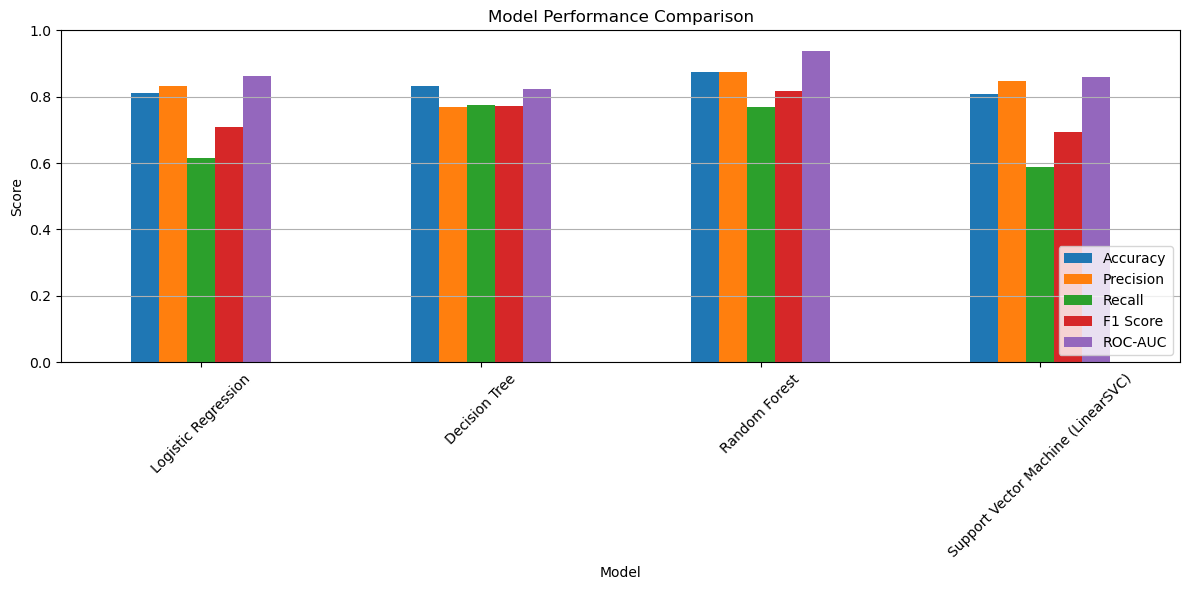

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine results into a DataFrame
results_df = pd.DataFrame([
    dummy_results,
    logreg_results,
    tree_results,
    rf_results,
    svm_results
])

# Round scores for readability
results_df_rounded = results_df.round(4)

# Display table
print("Model Performance Comparison:\n")
print(results_df_rounded)

# Plot bar chart
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'PR-AUC']
results_df_rounded.set_index('Model')[metrics_to_plot].plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Cross-validation for more reliable metrics
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'pr_auc': 'average_precision'
}

models_cv = {
    'Logistic Regression (balanced)': LogisticRegression(max_iter=2000, class_weight='balanced'),
    'Decision Tree (balanced)': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest (balanced_subsample)': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample'),
    'LinearSVC (balanced)': LinearSVC(random_state=42, max_iter=10000, class_weight='balanced')
}

cv_rows = []
for name, model in models_cv.items():
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    row = {'Model': name}
    for metric in scoring.keys():
        mean = scores[f'test_{metric}'].mean()
        std = scores[f'test_{metric}'].std()
        row[metric.upper()] = f"{mean:.4f} +/- {std:.4f}"
    cv_rows.append(row)

cv_df = pd.DataFrame(cv_rows)
print('Cross-Validation Results (mean +/- std):')
print(cv_df)


Top correlated features with is_canceled:
 is_canceled                   1.000000
deposit_type_Non Refund       0.481457
lead_time                     0.293123
market_segment_Groups         0.221859
distribution_channel_TA/TO    0.175944
customer_type_Transient       0.133084
previous_cancellations        0.110133
adults                        0.060017
days_in_waiting_list          0.054186
adr                           0.047557
Name: is_canceled, dtype: float64


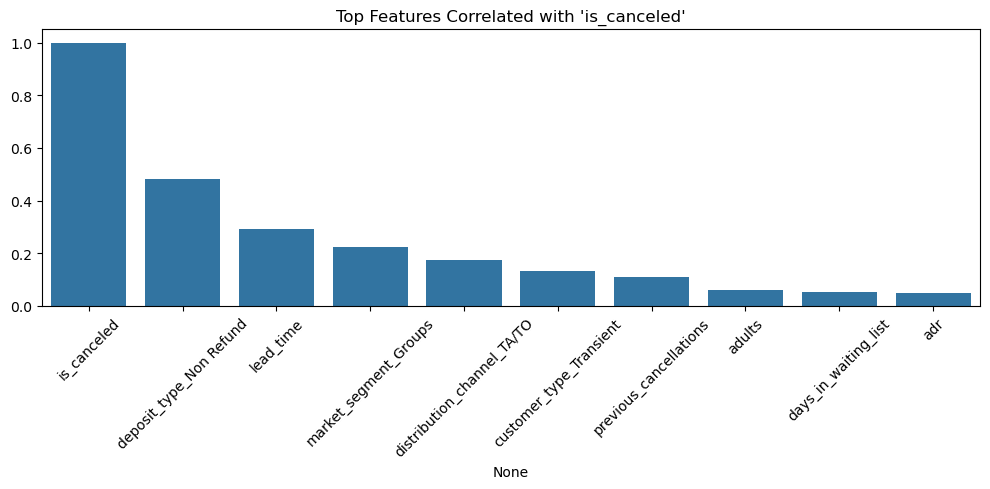

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation with target
correlation = df_encoded.corr()['is_canceled'].sort_values(ascending=False)
print("Top correlated features with is_canceled:\n", correlation.head(10))

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation.head(10).index, y=correlation.head(10).values)
plt.title("Top Features Correlated with 'is_canceled'")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
